## Import necessary modules

In [33]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
sb.set()
import re

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score

## Import cleaned file

In [34]:
laptop_data_clean = pd.read_csv('./laptop_data_clean.csv', encoding='latin-1')
laptop_data_clean.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_sgd
0,Apple,MacBook Pro,Ultrabook,13.3,2560x1600,Intel Core i5,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,2103.31
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,1411.34
2,HP,250 G6,Notebook,15.6,1920x1080,Intel Core i5,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,902.75
3,Apple,MacBook Pro,Ultrabook,15.4,2880x1800,Intel Core i7,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,3983.80
4,Apple,MacBook Pro,Ultrabook,13.3,2560x1600,Intel Core i5,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,2831.65


## Visualisation of data

In [35]:
print("Data type : ", type(laptop_data_clean))
print("Data dims : ", laptop_data_clean.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (1303, 12)


In [36]:
laptop_data_clean.describe()

,Inches,Ram,Weight,Price_sgd
count,1303.000000,1303.000000,1303.000000,1303.000000
mean,15.017191,8.382195,2.038734,1764.188411
std,1.426304,5.084665,0.665475,1097.444257
min,10.100000,2.000000,0.690000,273.180000
25%,14.000000,4.000000,1.500000,940.430000
50%,15.600000,8.000000,2.040000,1533.890000
75%,15.600000,8.000000,2.300000,2335.970000
max,18.400000,64.000000,4.700000,9575.430000


<Axes: xlabel='Company'>

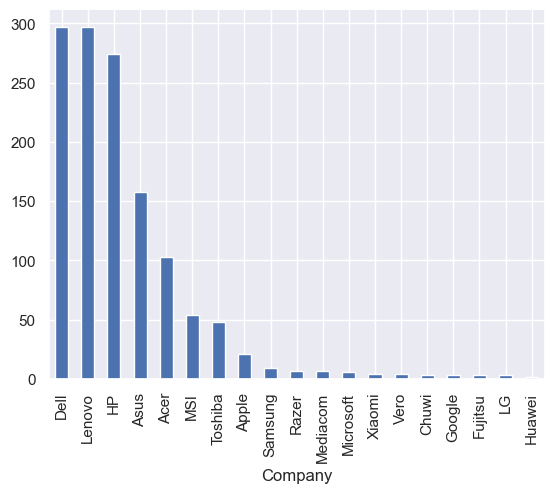

In [37]:
laptop_data_clean['Company'].value_counts().plot(kind='bar')

### Numerical Distribution

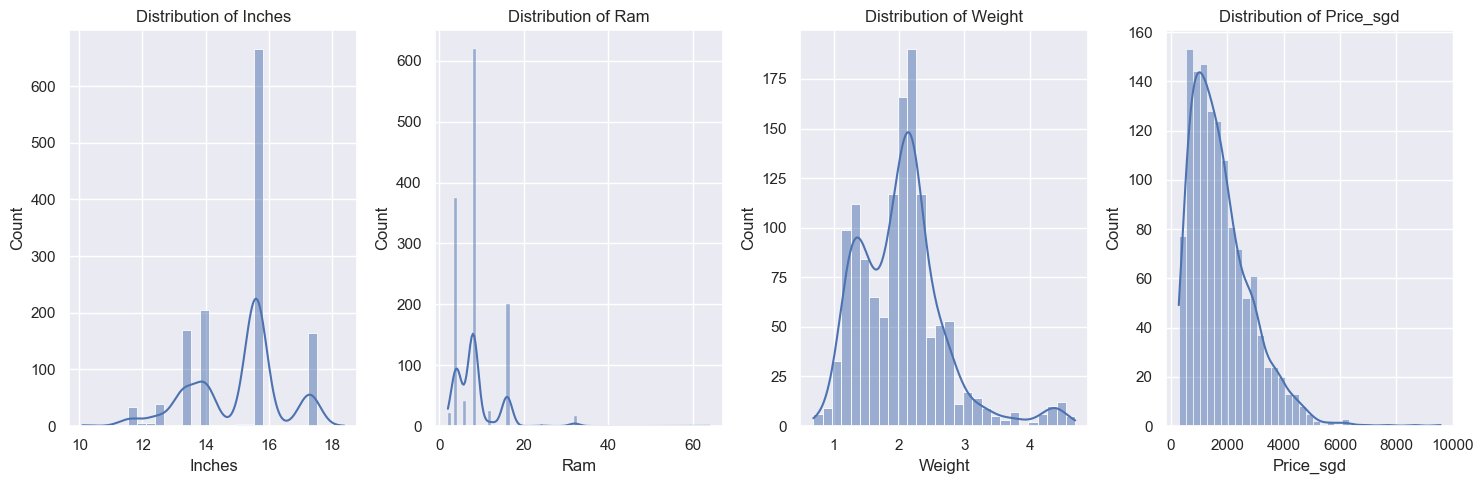

In [38]:
numerical_columns = laptop_data_clean.select_dtypes(include=['float64', 'int64'])

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 5))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Plotting the distribution for each numerical column
for i, column in enumerate(numerical_columns.columns):
    sb.histplot(data=laptop_data_clean, x=column, ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {column}')

# Adjusting layout
plt.tight_layout()
plt.show()

### Categorical distribution

In [39]:
#Method 1
PROPS = {
    'boxprops':{'edgecolor':'black'},
    'medianprops':{'color':'black'},
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'}
}

def plot_box(x, y, subtitle, color, order=None):
    plt.figure(figsize=(25, 10)) 
    ax = sb.boxplot(data = laptop_data_clean, y = y, x = x, order = order,
                 linewidth = 0.8, color = color, **PROPS,
                 flierprops = dict(marker = 'o', markeredgecolor = 'black', markersize = 2.5, linestyle = 'none',  alpha = 0.9))


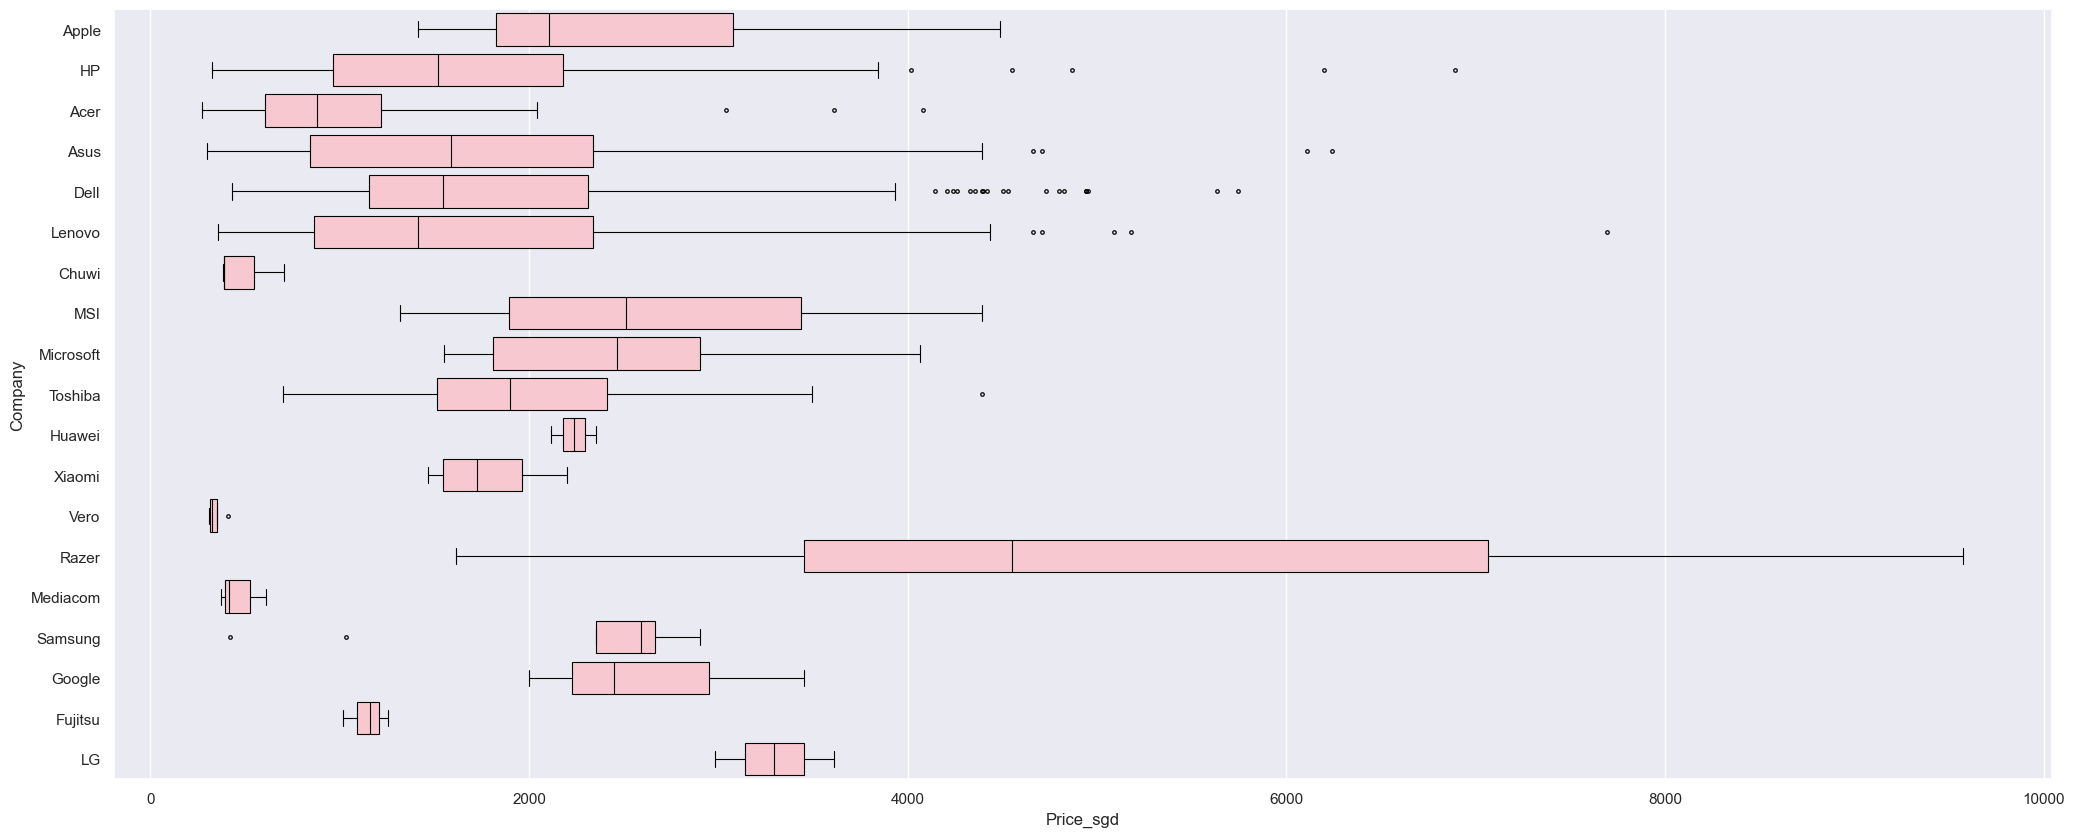

In [40]:
plot_box(x = "Price_sgd", y = "Company",
         subtitle = "Distributions, boxplots", color = "pink")

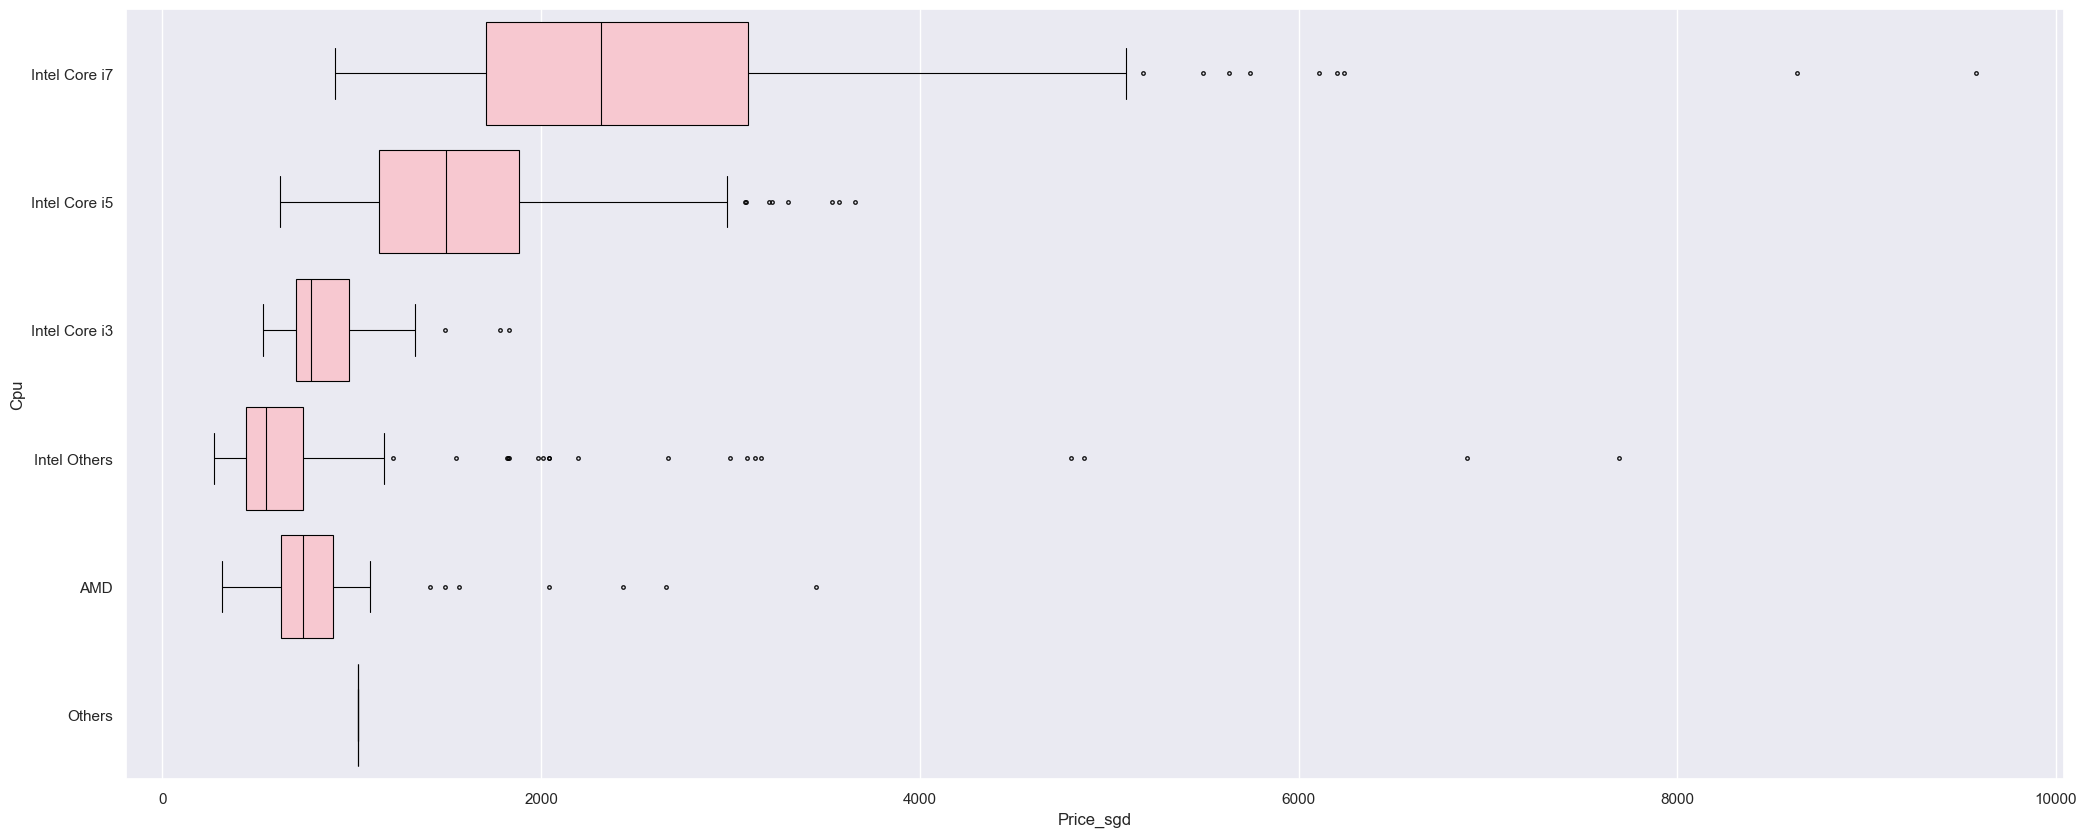

In [41]:
plot_box(x = "Price_sgd", y = "Cpu", 
         subtitle = "Distributions, boxplots", color = "pink",
         order = ["Intel Core i7", "Intel Core i5", "Intel Core i3", "Intel Others", "AMD", "Others"])

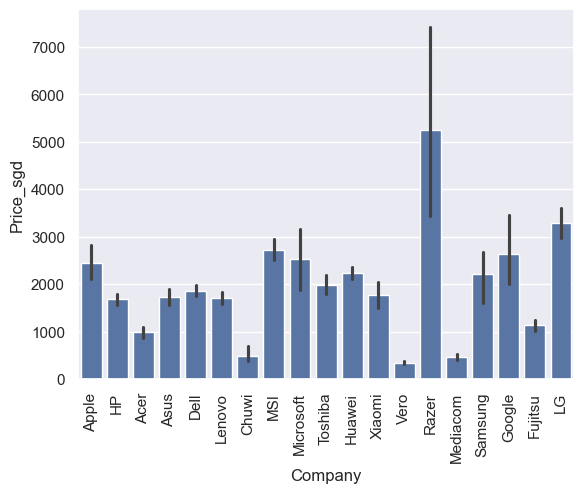

In [42]:
# Method 2
sb.barplot(x=laptop_data_clean['Company'],y=laptop_data_clean['Price_sgd'])
plt.xticks(rotation='vertical')
plt.show()

### Initial assumption is that Apple is more expensive than other brands due to its popularity and branding

> However, with the boxplot we discovered that Razer has the highest median and the distribution of the Razer is towards the furhter positioned to the right compared to the other brands. 

> Knowing that Razer tags its price the highest, what makes it the most expensive? What attribute of the laptop contributes to the increase of price?

## Correlation matrix

In [43]:
## from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
laptop_data_clean['Company'] = le.fit_transform(laptop_data_clean['Company'])
laptop_data_clean['Product'] = le.fit_transform(laptop_data_clean['Product'])
laptop_data_clean['TypeName'] = le.fit_transform(laptop_data_clean['TypeName'])
# laptop_data_clean['Inches'] = le.fit_transform(laptop_data_clean['Inches'])
laptop_data_clean['ScreenResolution'] = le.fit_transform(laptop_data_clean['ScreenResolution'])
# laptop_data_clean['Ram'] = le.fit_transform(laptop_data_clean['Ram'])
laptop_data_clean['Memory'] = le.fit_transform(laptop_data_clean['Memory'])
laptop_data_clean['Cpu'] = le.fit_transform(laptop_data_clean['Cpu'])
laptop_data_clean['Gpu'] = le.fit_transform(laptop_data_clean['Gpu'])
laptop_data_clean['OpSys'] = le.fit_transform(laptop_data_clean['OpSys'])
# laptop_data_clean['Weight'] = le.fit_transform(laptop_data_clean['Weight'])
# laptop_data_clean['Price_euros'] = le.fit_transform(laptop_data_clean['Price_euros'])
laptop_data_clean

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_sgd
0,1,297,4,13.3,10,2,8,4,58,8,1.37,2103.31
1,1,298,4,13.3,1,2,8,2,51,8,1.34,1411.34
2,7,50,3,15.6,3,2,8,16,53,4,1.86,902.75
3,1,297,4,15.4,12,3,16,29,9,8,1.83,3983.80
4,1,297,4,13.3,10,2,8,16,59,8,1.37,2831.65
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,10,555,0,14.0,3,3,4,4,47,5,1.80,1001.66
1299,10,563,0,13.3,13,3,16,29,47,5,1.30,2353.43
1300,10,193,3,14.0,0,4,2,35,40,5,1.50,359.53
1301,7,2,3,15.6,0,3,6,10,21,5,2.19,1199.48


                   Company   Product  TypeName    Inches  ScreenResolution  \
Company           1.000000  0.076293 -0.007718 -0.085784          0.010799   
Product           0.076293  1.000000  0.066144 -0.219813          0.120319   
TypeName         -0.007718  0.066144  1.000000 -0.077428         -0.136328   
Inches           -0.085784 -0.219813 -0.077428  1.000000         -0.207340   
ScreenResolution  0.010799  0.120319 -0.136328 -0.207340          1.000000   
Cpu               0.015754  0.122563 -0.121127 -0.189155          0.184950   
Ram               0.046508  0.022826 -0.242862  0.237993          0.299397   
Memory            0.048086  0.088883  0.019091 -0.193382          0.105184   
Gpu               0.026537  0.097116 -0.204774  0.215710          0.149336   
OpSys             0.134290  0.124610  0.085223  0.034528          0.065728   
Weight           -0.129610 -0.248194 -0.267002  0.827631         -0.111036   
Price_sgd         0.140371  0.143242 -0.127314  0.068197        

<Axes: >

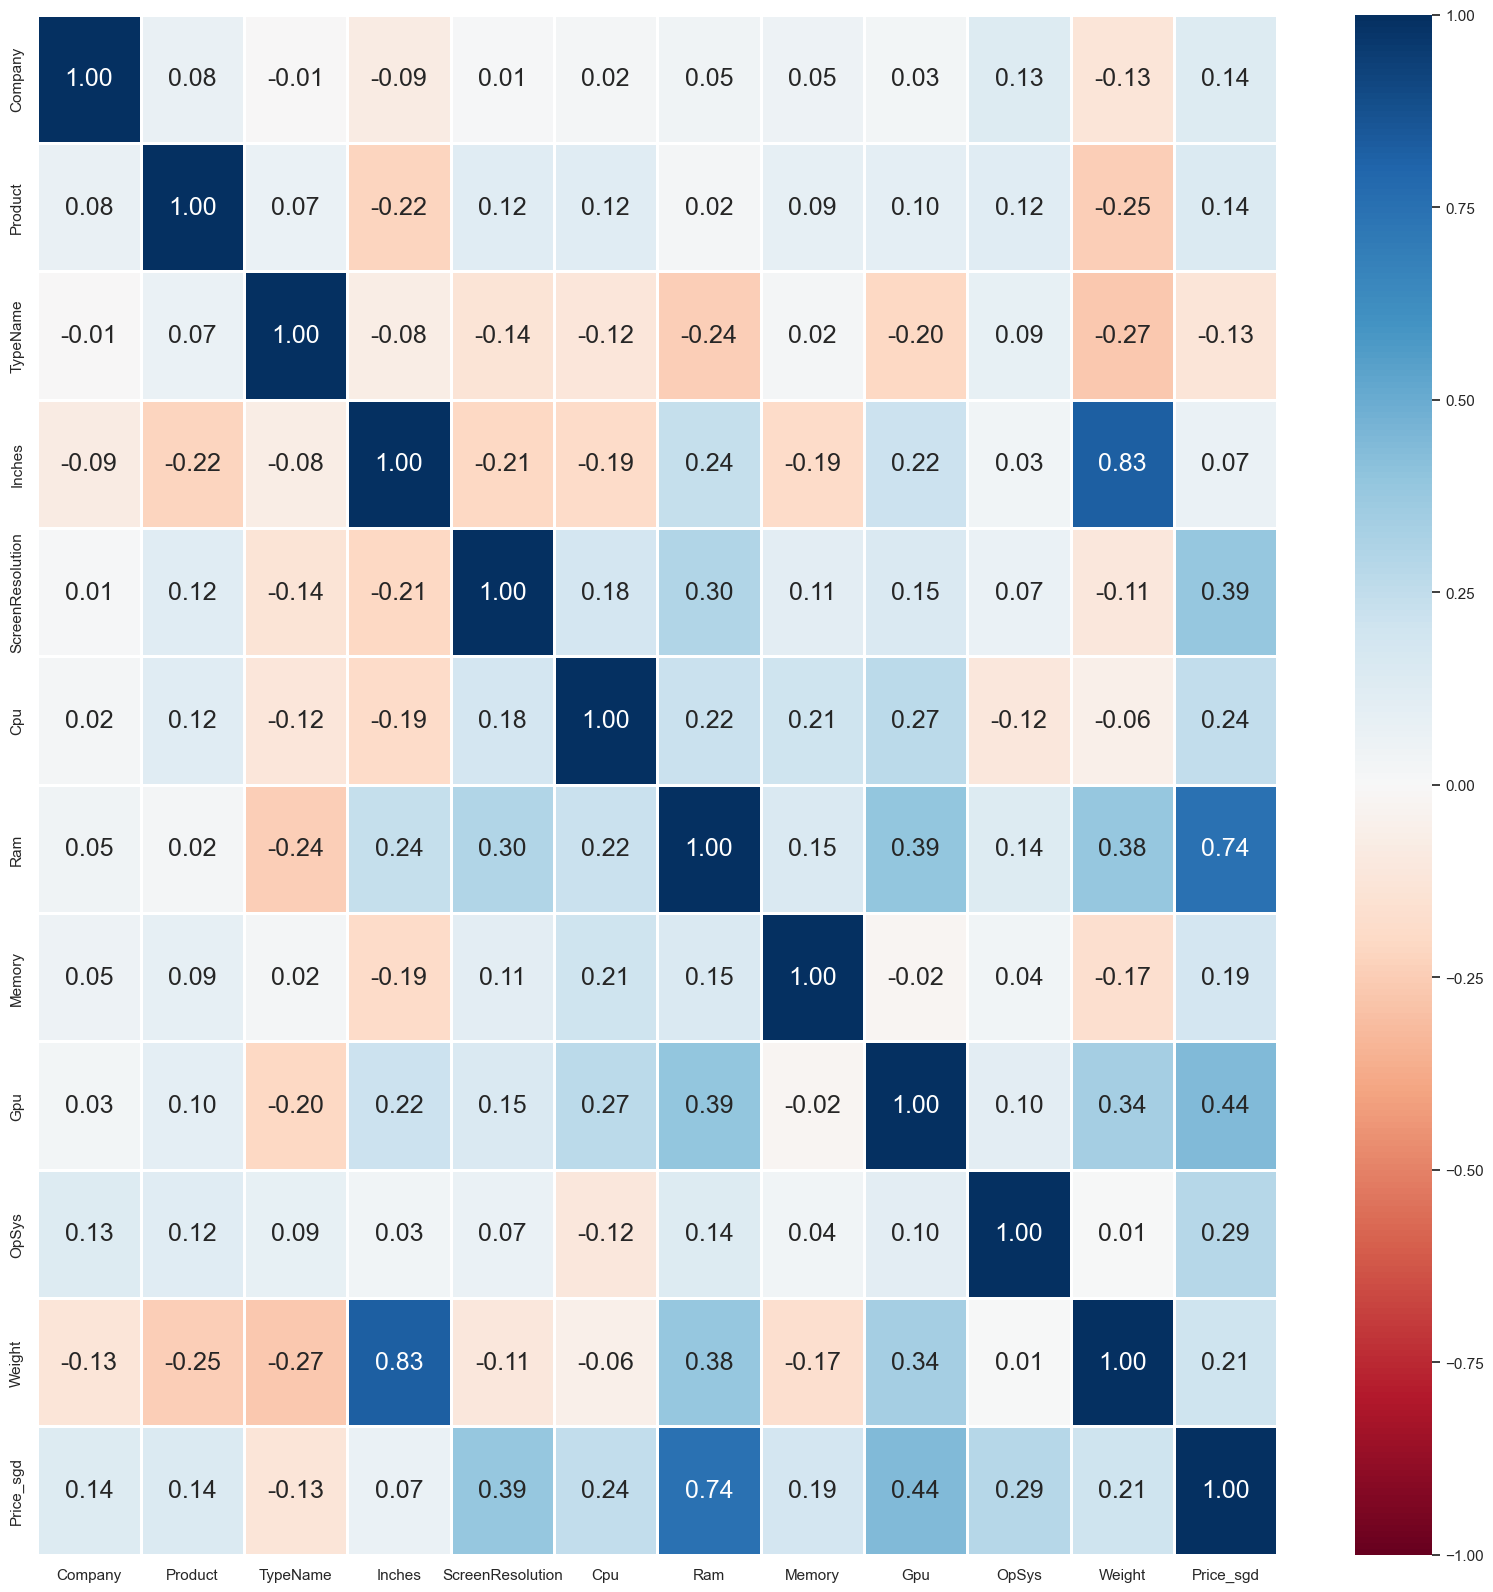

In [44]:
# Correlation Matrix
print(laptop_data_clean.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(20, 20))
sb.heatmap(laptop_data_clean.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

### Conclusion based on the correlation matrix

> Converting the columns that are labeled as string to a certain integer based on their type, we are able to correlate all the chosen attributes that may affect the price.
> Looking at the correlation matrix, we picked the first 4 attributes that have the highest correlation with the price as it can potentially help us predict the price.

#### Correlation value from highest to lowest (first 4 attributes): 

> Ram - 0.74

> GPU - 0.44

> Screen resolution - 0.39

> Operating system - 0.29